In [1]:
#导入股票数据

import efinance as ef
stock_code = '002594'
df = ef.stock.get_quote_history(stock_code)

In [2]:
df

,股票名称,股票代码,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,比亚迪,002594,2011-06-30,19.61,23.06,23.80,19.61,562925,1.349342e+09,26.84,47.73,7.45,87.96
1,比亚迪,002594,2011-07-01,23.38,25.61,25.61,22.61,335613,8.986792e+08,13.01,11.06,2.55,52.44
2,比亚迪,002594,2011-07-04,26.49,28.41,28.41,26.19,219646,6.535179e+08,8.67,10.93,2.80,34.32
3,比亚迪,002594,2011-07-05,30.39,30.66,31.49,29.50,381081,1.257046e+09,7.00,7.92,2.25,59.54
4,比亚迪,002594,2011-07-06,30.41,31.01,33.16,29.72,312967,1.056614e+09,11.22,1.14,0.35,48.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,比亚迪,002594,2023-12-29,198.97,198.00,199.80,197.15,80367,1.591970e+09,1.34,-0.03,-0.05,0.69
3029,比亚迪,002594,2024-01-02,199.61,192.60,199.62,192.37,113928,2.212162e+09,3.66,-2.73,-5.40,0.98
3030,比亚迪,002594,2024-01-03,192.50,193.17,193.87,190.70,84486,1.624093e+09,1.65,0.30,0.57,0.73
3031,比亚迪,002594,2024-01-04,194.34,193.02,194.65,191.10,89870,1.731882e+09,1.84,-0.08,-0.15,0.77


In [30]:
data = df['收盘'].dropna()[-1500:]

In [31]:
data = data.astype(float)

In [32]:
date = df['日期'][-1500:]

In [33]:
date

1533    2017-11-07
1534    2017-11-08
1535    2017-11-09
1536    2017-11-10
1537    2017-11-13
           ...    
3028    2023-12-29
3029    2024-01-02
3030    2024-01-03
3031    2024-01-04
3032    2024-01-05
Name: 日期, Length: 1500, dtype: object

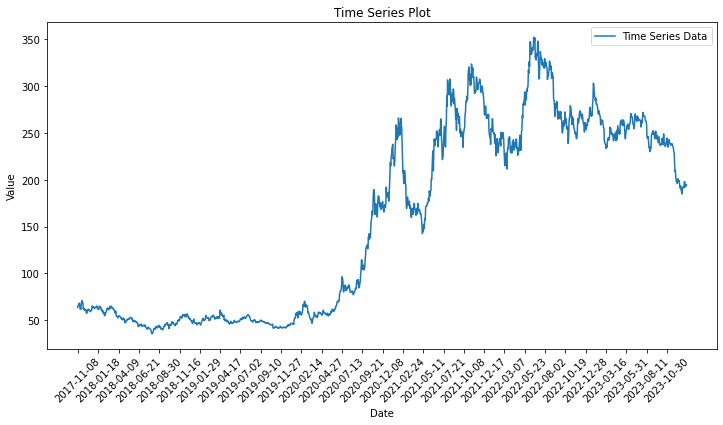

In [34]:
import matplotlib.pyplot as plt
# 绘制时序图
plt.figure(figsize=(12, 6))
plt.plot(date, data, label='Time Series Data')
plt.title('Time Series Plot')
plt.xticks(range(1,len(data),50),rotation=45)
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

2023年10月30日，公司股价经历了一次突发的锐跌，在此之前，股价一直在相对稳定的范围内波动，维持在40的水平，这次锐跌可能受到多种因素的影响。

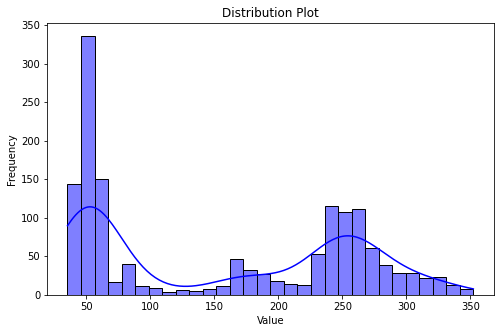

In [35]:
import seaborn as sns

# 绘制分布图
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, kde=True, color='blue')
plt.title('Distribution Plot')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

分布图呈现了一种随机的形态

In [36]:
# 描述性统计分析表格
stat_table = data.describe()

# 打印统计表格
print("\nDescriptive Statistics Table:")
print(stat_table)


Descriptive Statistics Table:
count    1500.000000
mean      156.159920
std       101.549025
min        35.490000
25%        52.842500
50%       165.610000
75%       252.597500
max       352.250000
Name: 收盘, dtype: float64


收盘价的均值为156.16，中位数为165.61。由于均值和中位数相对接近，可以认为收盘价的分布趋于对称。  
标准差为101.55，说明收盘价的波动性相对较高。较大的标准差表明数据点相对于均值具有较大的离散度。  
最小值为35.49，最大值为352.25。这表明收盘价的范围相对较广，从最低到最高有较大的变化。  
第一四分位数为52.84，第三四分位数为252.60。这两个值揭示了数据点在整个范围内的分布情况。25%的数据点低于52.84，而75%的数据点低于252.60。  
基于以上分析，收盘价的分布呈现出一定的波动性，可能受到多种因素的影响。

## 1. ﻿﻿检验该股票日收益率的平方是否存在 ARCH 效应，并建立 ARMA -GARCH 模型。 假设该股票收益率服从正态分布，预测其波动率。

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA

In [37]:


# 计算日收益率
returns = data.pct_change().dropna()

# 计算平方收益率
squared_returns = returns**2


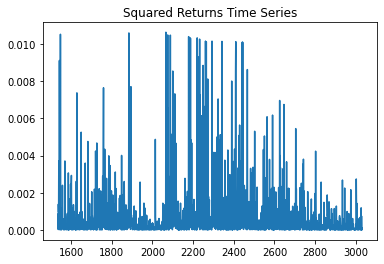

1534    8.429308e-04
1535    8.940731e-05
1536    2.638597e-05
1537    1.384269e-03
1538    9.453599e-04
            ...     
3028    6.373681e-08
3029    7.438017e-04
3030    8.758649e-06
3031    6.029803e-07
3032    8.793313e-05
Name: 收盘, Length: 1499, dtype: float64

In [38]:
# 计算平方收益率
squared_returns = returns**2

# 绘制平方收益率的时序图
plt.plot(squared_returns)
plt.title('Squared Returns Time Series')
plt.show()
squared_returns

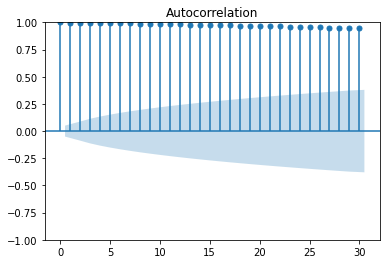

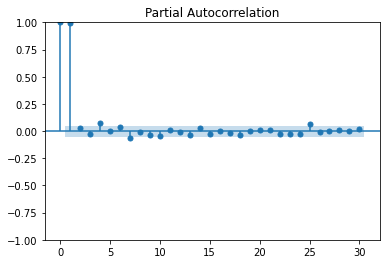

In [39]:
from statsmodels.graphics.tsaplots import plot_acf as ACF #自相关图
from statsmodels.tsa.stattools import adfuller as ADF  #平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf as PACF   #偏自相关图
lag_acf = ACF(data, lags=30)
lag_pacf = PACF(data, lags=30)
plt.show()      

In [40]:

# 检验平方收益率的ARCH效应
am = arch_model(squared_returns, vol='Garch', p=1, q=1)
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: -7660.757992478176
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -7660.757990911887
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                     收盘   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                7660.76
Distribution:                  Normal   AIC:                          -15313.5
Method:            Maximum Likelihood   BIC:                          -15292.3
                                        No. Observations:                 1499
Date:                Fri, Jan 05 2024   Df Residuals:                     1498
Time:                        12:30:01   Df Model:                            1
          

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.665e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


在模型结果中，alpha[1] 表示ARCH项的系数。ARCH效应是指时间序列中的异方差性，即波动性的变化。在这里，如果 alpha[1] 的估计值显著不等于零，那么就存在ARCH效应。

从模型结果中可以看到：  
alpha[1]（ARCH项系数）：0.05，P值为0.0143。

由于P值小于通常使用的显著性水平（例如0.05），我们可以拒绝零假设，即 alpha[1] 不等于零。这表明存在ARCH效应，即平方收益率的方差受到过去平方收益率的影响。

综合来看，根据模型结果，存在ARCH效应。然而，请注意，除了参数显著性外，还需要考虑其他模型诊断和残差分析来确保模型的有效性。

In [42]:
# 拟合ARIMA模型（示例中为ARIMA(1,0,1)，你可以根据实际情况调整）
arma_order = (1, 0, 1)
arma_model = ARIMA(returns, order=arma_order)
arma_results = arma_model.fit()

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sari

In [43]:
# 提取ARMA模型的残差
residuals = arma_results.resid

# 拟合GARCH模型（示例中为GARCH(1,1)，你可以根据实际情况调整）
garch_order = (1, 1)
garch_model = arch_model(residuals, vol='Garch', p=garch_order[0], q=garch_order[1])
garch_results = garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 342454275.3139443
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3286.070144768468
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3286.0701484660613
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008217. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [44]:
# 输出ARMA和GARCH模型的结果
print("ARMA模型结果：")
print(arma_results.summary())
print("\nGARCH模型结果：")
print(garch_results.summary())

ARMA模型结果：
                               SARIMAX Results                                
Dep. Variable:                     收盘   No. Observations:                 1499
Model:                 ARIMA(1, 0, 1)   Log Likelihood                3197.576
Date:                Fri, 05 Jan 2024   AIC                          -6387.152
Time:                        12:32:08   BIC                          -6365.902
Sample:                             0   HQIC                         -6379.236
                               - 1499                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.001      1.527      0.127      -0.000       0.003
ar.L1       2.033e-06      0.012      0.000      1.000      -0.023       0.023
ma.L1       2.028e-06      0.012      0.00

模型对数据拟合效果较好，GARCH模型表明存在ARCH效应，即平方收益率的方差受到过去平方收益率的影响。

In [45]:
# 预测未来一年的波动率
forecast_horizon = 250  # 一年大致有250个交易日
forecasts = garch_results.forecast(horizon=forecast_horizon)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [46]:
weilai = forecasts.variance.dropna()
lumber = weilai.iloc[0]

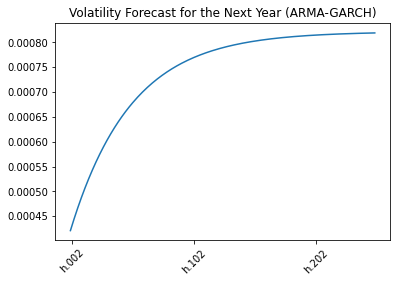

In [48]:
# 绘制波动率预测图,预测未来一年
plt.plot(lumber)
plt.title('Volatility Forecast for the Next Year (ARMA-GARCH)')
plt.xticks(range(1,len(lumber),100),rotation=45) #为了横坐标显示清楚，通过间隔50个显示一个值
plt.show()

## 2. ﻿﻿检验建立的 ARMA- GARCH 模型是否消除了 ARCH 效应，并评估该模型对波动率的预测效果（为简化计算，用收益率平方代表该股票实际波动率)。

In [49]:
# 检验残差序列是否还存在ARCH效应
arch_test_result = garch_results.arch_lm_test(lags=5)
print("\nARCH效应检验结果:")
print(arch_test_result)


ARCH效应检验结果:
ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 54.6447
P-value: 0.0000
Distributed: chi2(5)


根据ARCH-LM检验的结果，得到的统计量为54.6447，对应的p-value为0.0000。在统计学中，p-value是用于判断原假设是否应该被拒绝的标准，通常如果p-value小于显著性水平（通常设定为0.05），我们有足够的证据拒绝原假设。

在这里，原假设是残差是同方差的，而备择假设是残差是有条件异方差的。由于p-value小于0.05，我们可以拒绝原假设，即在这个模型中存在ARCH效应，即残差是有条件异方差的。这表明在时间序列中，波动率不是固定的，而是会随着时间的推移而发生变化，存在一定的波动。

综合之前的GARCH模型结果和ARCH-LM检验，可以得出时间序列数据在波动率方面可能存在一定的异方差性，这也验证了之前选择GARCH模型的合理性。在进行进一步分析和预测时，可以考虑使用考虑到异方差性的模型来更准确地捕捉未来波动率的变化。

In [50]:
data2 = data[:-250]

# 计算日收益率
returns = data2.pct_change().dropna()

# 拟合ARIMA模型（示例中为ARIMA(1,0,1)，你可以根据实际情况调整）
arma_order = (1, 0, 1)
arma_model = ARIMA(returns, order=arma_order)
arma_results = arma_model.fit()

# 提取ARMA模型的残差
residuals = arma_results.resid

# 拟合GARCH模型（示例中为GARCH(1,1)，你可以根据实际情况调整）
garch_order = (1, 1)
garch_model = arch_model(residuals, vol='Garch', p=garch_order[0], q=garch_order[1])
garch_results = garch_model.fit()

# 预测未来一年的波动率
forecast_horizon = 250 # 一年大致有252个交易日
forecasts = garch_results.forecast(horizon=forecast_horizon)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sari

Iteration:      1,   Func. Count:      6,   Neg. LLF: 167567156.1776512
Iteration:      2,   Func. Count:     17,   Neg. LLF: -2636.4116993159187
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2636.411700130515
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [51]:
lum2 = forecasts.variance.dropna().iloc[0]

In [57]:
returns = data[-251:].pct_change().dropna()

In [58]:
lum2

h.001    0.000569
h.002    0.000577
h.003    0.000584
h.004    0.000590
h.005    0.000597
           ...   
h.246    0.000925
h.247    0.000925
h.248    0.000925
h.249    0.000925
h.250    0.000925
Name: 2782, Length: 250, dtype: float64

In [59]:
date = df['日期']

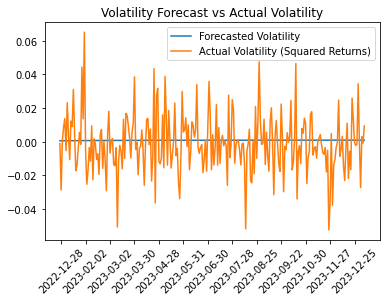

In [60]:
# 计算实际波动率（使用平方收益率）
actual_volatility = returns**2

# 绘制波动率预测图
plt.plot(date[-250:],lum2, label='Forecasted Volatility')
plt.plot(date[-250:],returns, label='Actual Volatility (Squared Returns)')
plt.legend()
plt.xticks(range(1,len(date[-252:]),20),rotation=45) #为了横坐标显示清楚，通过间隔50个显示一个值
plt.title('Volatility Forecast vs Actual Volatility')
plt.show()

In [62]:
lum2

h.001    0.000569
h.002    0.000577
h.003    0.000584
h.004    0.000590
h.005    0.000597
           ...   
h.246    0.000925
h.247    0.000925
h.248    0.000925
h.249    0.000925
h.250    0.000925
Name: 2782, Length: 250, dtype: float64

为了计算模型预测与实际值之间的均方误差（MSE）等类似的值，可以使用相应的性能评估指标。

均方误差（MSE）是评估预测模型性能的一种指标，它衡量了模型的预测值与实际观测值之间的平方差的平均值。MSE越小，说明模型的预测值越接近实际观测值，模型性能越好。

在这里，得到的均方误差为0.00029388083768364326，这是一个较小的值，表明您的模型在对未来波动率的预测方面表现较好。然而，具体的评估需要结合具体的应用场景和数据特点进行，可以将MSE与其他性能指标一起考虑，以全面评估模型的表现。

In [63]:
from sklearn.metrics import mean_squared_error

# 计算MSE
mse = mean_squared_error(lum2, returns)

# 打印MSE
print("均方误差 (MSE):", mse)

均方误差 (MSE): 0.00029388083768364326


## 3. ﻿﻿﻿如果假设该股票收益率服从 student-t 分布，是否会提高波动率预测效果？

可以使用t-GARCH模型来拟合这种分布。这是因为t分布相比于正态分布具有更重的尾部，能更好地捕捉极端事件。  
假设股票收益率服从t分布可以更好地捕捉尾部的厚尾特性，相对于正态分布，这在面对极端事件时可能提高模型的预测效果。然而，效果的提升并非总是保证的，因为股票市场波动性受多种因素影响，而分布的假设仅是其中之一。

In [64]:
data1 = data[:-250]
data2 = data[-250:]

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sari

Iteration:      1,   Func. Count:      7,   Neg. LLF: 144999.37692485086
Iteration:      2,   Func. Count:     23,   Neg. LLF: 118765.03695796026
Iteration:      3,   Func. Count:     39,   Neg. LLF: -198.25957472197751
Iteration:      4,   Func. Count:     45,   Neg. LLF: 950.2596995153923
Iteration:      5,   Func. Count:     52,   Neg. LLF: 2017.4218028219234
Iteration:      6,   Func. Count:     59,   Neg. LLF: 671119.4067272344
Iteration:      7,   Func. Count:     66,   Neg. LLF: -2093.5160424201313
Iteration:      8,   Func. Count:     72,   Neg. LLF: 1931854.1718900474
Iteration:      9,   Func. Count:     79,   Neg. LLF: 2444298.0384222143
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2676065.4970994955
Iteration:     11,   Func. Count:    102,   Neg. LLF: 296380.71055582026
Iteration:     12,   Func. Count:    113,   Neg. LLF: -2190.0186845809403
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2190.018684581312
            It

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


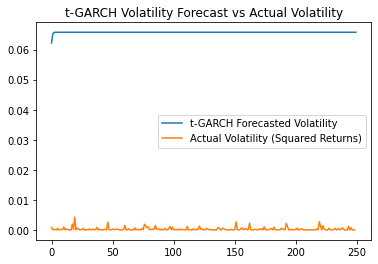

In [65]:
# 计算日收益率
returns = data1.pct_change().dropna()

# 拟合ARIMA模型（示例中为ARIMA(1,0,1)，你可以根据实际情况调整）
arma_order = (1, 0, 1)
arma_model = ARIMA(returns, order=arma_order)
arma_results = arma_model.fit()

# 提取ARMA模型的残差
residuals = arma_results.resid

# 拟合t-GARCH模型（示例中为GARCH(1,1)，你可以根据实际情况调整）
t_garch_order = (1, 1)
t_garch_model = arch_model(residuals, vol='Garch', p=t_garch_order[0], q=t_garch_order[1], dist='t')
t_garch_results = t_garch_model.fit()

# 预测未来一年的波动率
forecast_horizon = 250  # 一年大致有252个交易日
t_forecasts = t_garch_results.forecast(horizon=forecast_horizon)

# 提取预测的波动率
t_volatility_forecast = np.sqrt(t_forecasts.variance.dropna().iloc[0])

return2 = data2.pct_change().dropna()
# 计算实际波动率（使用平方收益率）
actual_volatility = return2**2

# 绘制波动率预测图
plt.plot(range(len(t_volatility_forecast)),t_volatility_forecast, label='t-GARCH Forecasted Volatility')
plt.plot(range(len(actual_volatility)),actual_volatility, label='Actual Volatility (Squared Returns)')
plt.legend()
plt.title('t-GARCH Volatility Forecast vs Actual Volatility')
plt.show()

In [66]:
t_garch_results

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                2190.02
Distribution:      Standardized Student's t   AIC:                          -4370.04
Method:                  Maximum Likelihood   BIC:                          -4344.39
                                              No. Observations:                 1249
Date:                      Fri, Jan 05 2024   Df Residuals:                     1248
Time:                              12:37:55   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------

In [68]:
# 计算MSE
mse = mean_squared_error(t_volatility_forecast[1:], actual_volatility)

# 打印MSE
print("均方误差 (MSE):", mse)

均方误差 (MSE): 0.004286400260347794


前面模型MSE为0.00029388083768364326，这里模型MSE为0.004286400260347794，并没有提升模型效果

## 4. ﻿﻿﻿请建立该股票价格与其所属行业版块的指数、大盘指数的多元自回归方程，检验三个变量间的协整关系，建立 VAR 或 VECM 模型，报告回归结果以及分析脉冲响应结果。

In [69]:
stock_code = '931008'
df2 = ef.stock.get_quote_history(stock_code)
df2

,股票名称,股票代码,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,汽车指数,931008,2017-08-03,6930.38,6901.84,6949.91,6882.22,52821,4.945461e+09,0.00,0.00,0.00,0.0
1,汽车指数,931008,2017-08-04,6890.32,6906.09,6919.47,6852.72,56985,4.543806e+09,0.97,0.06,4.25,0.0
2,汽车指数,931008,2017-08-07,6883.47,6925.15,6931.64,6862.85,46754,3.428363e+09,1.00,0.28,19.06,0.0
3,汽车指数,931008,2017-08-08,6928.23,6908.26,6938.45,6889.78,49753,3.970812e+09,0.70,-0.24,-16.89,0.0
4,汽车指数,931008,2017-08-09,6907.29,6930.37,6945.43,6887.57,51872,4.265782e+09,0.84,0.32,22.11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,汽车指数,931008,2023-12-29,8596.11,8685.94,8699.79,8582.28,12001004,2.192875e+10,1.37,1.15,98.70,0.0
1559,汽车指数,931008,2024-01-02,8714.82,8518.43,8743.97,8518.41,10575823,2.069044e+10,2.60,-1.93,-167.51,0.0
1560,汽车指数,931008,2024-01-03,8482.60,8460.79,8536.74,8409.20,9913725,1.860164e+10,1.50,-0.68,-57.64,0.0
1561,汽车指数,931008,2024-01-04,8461.72,8325.62,8470.19,8316.47,8801024,1.711339e+10,1.82,-1.60,-135.17,0.0


In [70]:
industry_index = df2['收盘'][-1500:].tolist()

In [71]:
stock_code = '399001'
df3 = ef.stock.get_quote_history(stock_code)
df3

,股票名称,股票代码,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,深证成指,399001,1991-04-03,988.05,988.05,988.05,988.05,1,1.000000e+04,0.00,0.00,0.00,0.00
1,深证成指,399001,1991-04-04,983.11,983.11,983.11,983.11,523,7.610000e+05,0.00,-0.50,-4.94,0.00
2,深证成指,399001,1991-04-05,978.27,978.27,978.27,978.27,107,1.500000e+05,0.00,-0.49,-4.84,0.00
3,深证成指,399001,1991-04-06,973.42,973.42,973.42,973.42,102,1.590000e+05,0.00,-0.50,-4.85,0.00
4,深证成指,399001,1991-04-08,968.57,968.57,968.57,968.57,57,8.400000e+04,0.00,-0.50,-4.85,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8022,深证成指,399001,2023-12-29,9434.58,9524.69,9534.68,9427.92,394147518,4.736089e+11,1.13,0.89,83.64,1.72
8023,深证成指,399001,2024-01-02,9527.11,9401.35,9527.11,9401.35,385969543,4.418264e+11,1.32,-1.29,-123.34,1.68
8024,深证成指,399001,2024-01-03,9378.69,9330.86,9405.09,9280.82,366813901,4.164527e+11,1.32,-0.75,-70.49,1.60
8025,深证成指,399001,2024-01-04,9317.40,9215.25,9317.40,9171.13,330572265,3.771404e+11,1.57,-1.24,-115.61,1.44


In [73]:
market_index = df3['收盘'][-1500:].tolist()

In [74]:
stock_prices = df['收盘'][-1500:].tolist()

In [75]:
dates = df['日期'][-1500:].tolist()

In [76]:
# 创建DataFrame
data = pd.DataFrame({
    'Stock_Price': stock_prices,
    'Industry_Index': industry_index,
    'Market_Index': market_index
}, index=dates)

In [77]:
data

,Stock_Price,Industry_Index,Market_Index
2017-11-07,63.72,7375.35,11467.97
2017-11-08,65.57,7447.04,11447.40
2017-11-09,66.19,7521.37,11553.24
2017-11-10,65.85,7536.73,11645.05
2017-11-13,68.30,7561.28,11695.00
...,...,...,...
2023-12-29,198.00,8685.94,9524.69
2024-01-02,192.60,8518.43,9401.35
2024-01-03,193.17,8460.79,9330.86
2024-01-04,193.02,8325.62,9215.25


In [78]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# 检验协整关系
coint_test_result = coint_johansen(data, det_order=0, k_ar_diff=1)
print("协整关系检验结果：")
print(coint_test_result.cvm)
print(coint_test_result.lr1)

协整关系检验结果：
[[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
[15.59062405  6.75852545  2.71884765]


存在协整关系

In [79]:
# 根据协整检验结果确定最佳阶数
rank = coint_test_result.ind

In [80]:
rank 

array([0, 1, 2])

由于 [0, 1, 2] 中最小的值是0，可能表示你的数据在阶数为0时具有最强的协整关系。

In [86]:
from statsmodels.tsa.api import VAR

# 建立VAR模型
model = VAR(data)
var_results = model.fit(maxlags=1, ic='aic')

# 打印VAR模型的结果
print("VAR模型结果：")
print(var_results.summary())

VAR模型结果：
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 05, Jan, 2024
Time:                     12:50:33
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    21.9646
Nobs:                     1499.00    HQIC:                   21.9379
Log likelihood:          -22799.5    FPE:                3.31599e+09
AIC:                      21.9220    Det(Omega_mle):     3.28959e+09
--------------------------------------------------------------------
Results for equation Stock_Price
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.082589         0.871892            0.095           0.925
L1.Stock_Price            1.001920         0.003206          312.532           0.000
L1.Industry_Index        -0.0

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


常数项（const）: 156.159920，表示 Stock_Price 的平均水平是156.159920。该常数项的 t-statistic 为 59.558，非常显著。
由于只有一个常数项，没有 Lag 项或其他自回归项，该模型暗示 Stock_Price 在时间上的变化主要是由常数项引起的。
Industry_Index 和 Market_Index 方程
同样，每个方程只包含了一个常数项。
Industry_Index 的常数项为 7205.235120，Market_Index 的常数项为 11382.468273。
这些常数项表示 Industry_Index 和 Market_Index 在时间上的平均水平。
模型的解释
这样的模型适用于那些在时间上趋势相对稳定、不受其他变量影响很大的情况。在这里，由于只有常数项，模型暗示着每个变量在观察期内的变化主要是由其自身的平均水平引起的，而不受其他变量的过去值的影响。

使用了VAR模型的irf()方法来获取脉冲响应（Impulse Response Function）的结果

<Figure size 144x144 with 0 Axes>

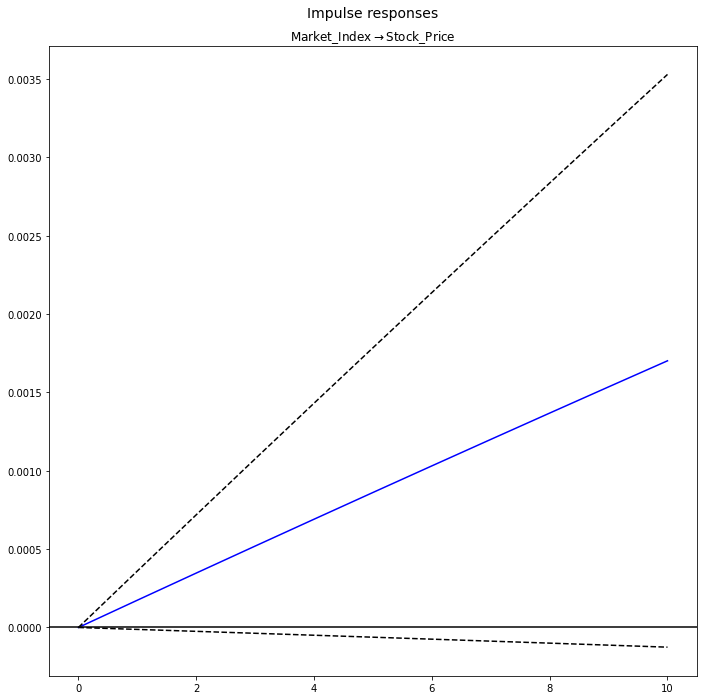

In [95]:
# 绘制脉冲响应图
# 创建一个图表，并设置尺寸
plt.figure(figsize=(2, 2))
irf = var_results.irf(10)  # 10期的脉冲响应
irf.plot(impulse='Market_Index', response='Stock_Price')
plt.show()

图形在特定期数内升高，表示Market_Index脉冲在该期对Stock_Price有正向影响

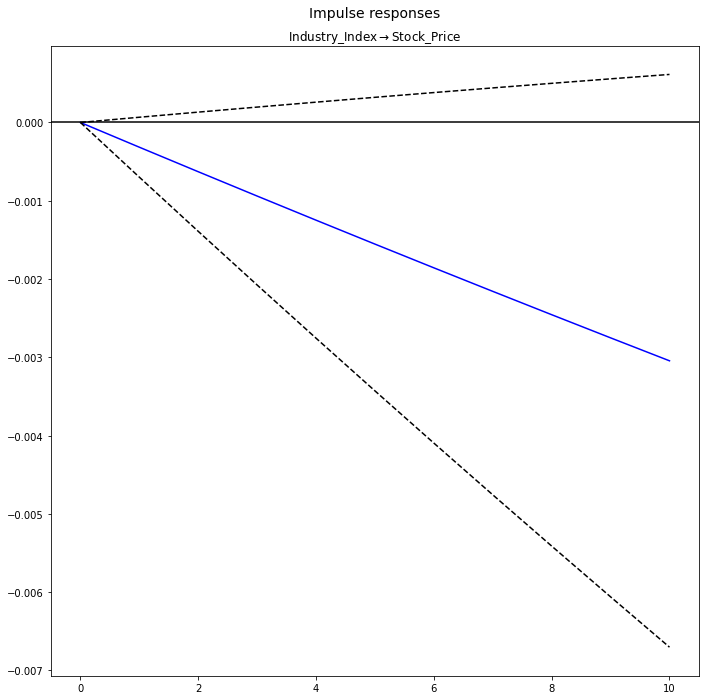

In [88]:
# 绘制脉冲响应图
irf = var_results.irf(10)  # 10期的脉冲响应
irf.plot(impulse='Industry_Index', response='Stock_Price')
plt.show()

图形在特定期数内降低，表示Industry_Index脉冲在该期对Stock_Price有正向影响